#PROBLEM 5: DBSCAN on toy-neighborhood data
You are to cluster, and visualize, a small dataset using DBSCAN epsilon = 7.5, MinPts = 3. You have been provided a file, dbscan.csv, that has the following columns for each point in the dataset: <br>
1. cluster originally empty, provided for your convenience pt a unique id for each data point
2. x point x-coordinate
3. y point y-coordinate
4. num_neighbors: number of neighbors, according to the coordinates above neighbors the id’s of all neighbors within <br>
As you can see, a tedious O(n^2) portion of the work has been done for you. Your job is to execute, point-by-point, the DBSCAN algorithm, logging your work.

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [155]:
data = pd.read_csv('/content/drive/MyDrive/USML/HW 2B/dbscan.csv')
data['neighbors'] = data['neighbors'].apply(lambda x: [int(i) for i in x.split(',')])

In [156]:
minPts = 3
c = 0
idx = 0

while idx < data.shape[0]:
  if(not pd.isna(data.loc[idx,'cluster'])):
    idx+=1
    continue
  if(data.loc[idx,'num_neighbors'] < minPts):
      data.loc[idx,'cluster'] = -1 # cluster of -1 means noise
      idx+=1
      continue

  c += 1
  data.loc[idx,'cluster'] = c

  seedset = []
  seedset.extend(data.loc[idx,'neighbors'])

  while len(seedset)>0:
    pt = seedset.pop(0)
    if(data.loc[pt,'cluster'] == -1):
      data.loc[pt,'cluster'] = c

    if(not pd.isna(data.loc[pt,'cluster'])):
      continue

    data.loc[pt,'cluster'] = c
    num_neighbors = data.loc[pt,'num_neighbors']

    if(num_neighbors >= minPts):
      seedset.extend(data.loc[pt,'neighbors'])

  idx+=1

In [159]:
data['cluster'].value_counts()

cluster
 2.0    43
-1.0    26
 1.0     8
 3.0     3
Name: count, dtype: int64

In [161]:
data.keys()

Index(['cluster', 'pt', 'x', 'y', 'num_neighbors', 'neighbors'], dtype='object')

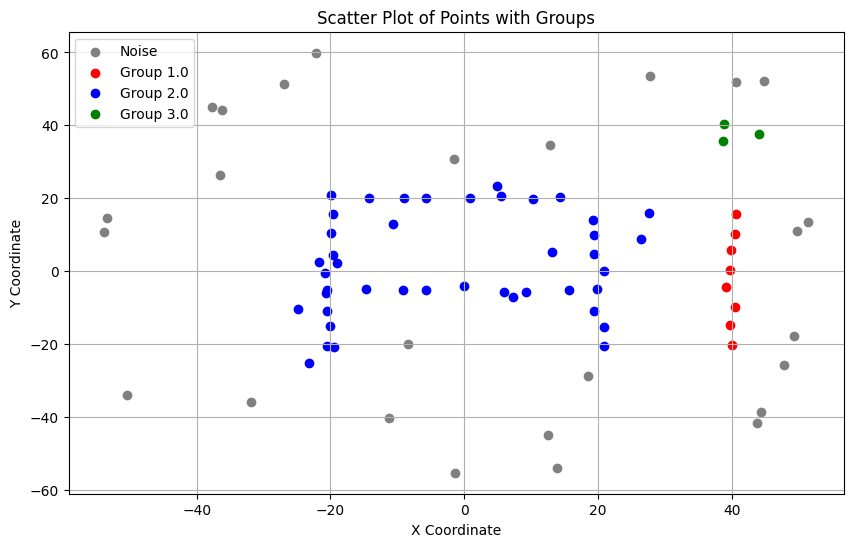

In [162]:
colors = {1: 'red', 2: 'blue', 3: 'green', -1: 'gray'}

plt.figure(figsize=(10, 6))
for label, group in data.groupby('cluster'):
    plt.scatter(group['x'], group['y'],
                c=colors[label], label=f'Group {label}' if label != -1 else 'Noise')

plt.title('Scatter Plot of Points with Groups')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.grid(True)
plt.show()